In [44]:
%matplotlib notebook
import csv
from scipy.io import loadmat
import numpy as np
import scipy.optimize as opt
from pandas.io.parsers import read_csv
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import PolynomialFeatures

In [61]:
data = loadmat('ex5data1.mat')
y = data['y']
x = data['X']
yval = data['yval']
xval = data['Xval']
ytest = data['ytest']
xtest = data['Xtest']
th = np.ones((2,1))
x = np.insert(x,0,np.ones(len(x)),axis=1)
xval = np.insert(xval,0,np.ones(len(xval)),axis=1)

In [46]:
def coste(th,x,y,reg = 0):
    m = x.shape[0]
    return (1/(2*m)) * np.sum(np.square(np.dot(x,th) - y)) + (reg/(2*m)) * np.sum(np.square(th[1:])) 
coste(th,x,y)

303.9515255535976

In [47]:
def gradiente(th,x,y,reg=0):
    t0 = np.sum((np.ravel(np.dot(x, th)-y)) * x[:,0])/len(x)
    t1 = np.sum((np.dot(x, th)-y) * x[:,1:])/len(x) + reg * np.ravel(th[1:])/len(x)
    return np.append(t0,t1)
gradiente(th,x,y)

array([-15.30301567, 598.16741084])

In [48]:
def linearRegCostFunction(theta, X, y, reg):
    m = len(y)
    h = np.matmul(X, theta[:, None])

    tt = np.copy(theta)
    tt[0] = 0
    cost = (np.sum((h - y) ** 2)) / (2 * m) + (reg / (2 * m)) * np.sum(tt ** 2)
    gradients = (np.sum((h - y) * X, axis=0) / m) + (reg / m) * tt

    return (cost, gradients)

In [49]:
def trainLinearReg(X, y, reg):
    initial_theta = np.zeros(np.size(X, 1))
    res = opt.minimize(fun=linearRegCostFunction,x0=initial_theta,args=(X,y,reg),jac=True,method='TNC',options={'maxiter':400,'disp':True})
    return res.x

In [50]:
peso = trainLinearReg(x,y,0)

<IPython.core.display.Javascript object>


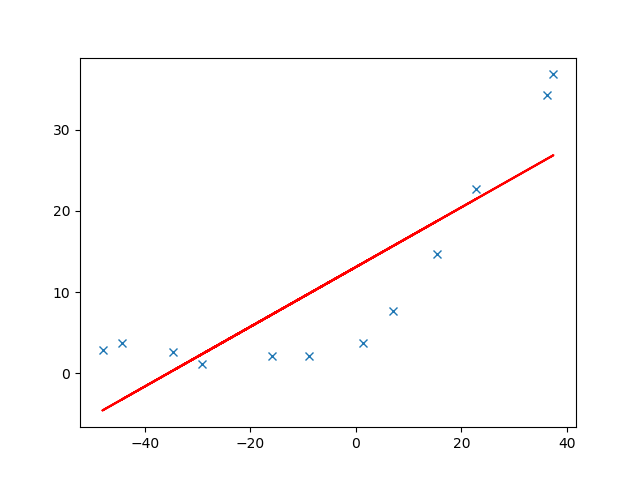

In [81]:
plt.plot(x[:,1], y, 'x')
plt.plot(x[:,1],peso[0]+peso[1]*x[:,1],"r")


In [109]:
pesos = []
error = []
val = []
for i in range(len(x)):
    pesos.append(trainLinearReg(x[0:i+1],y[0:i+1],0))
    error.append(np.sum(np.square(np.dot(x[0:i+1],pesos[i]) - np.ravel(y[0:i+1])))/(2*(i+1)))
    val.append(np.sum(np.square(np.dot(xval,pesos[i]) - np.ravel(yval)))/(2*len(xval)))

<IPython.core.display.Javascript object>


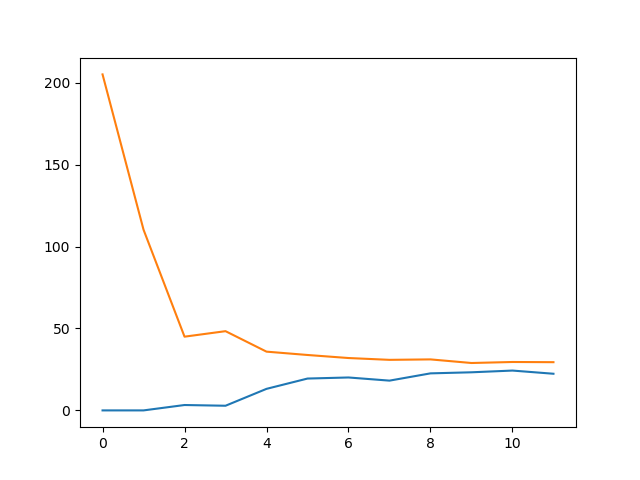

In [113]:
plt.plot(range(len(x)),error)
plt.plot(range(len(x)),val)

21